#  <span style="color:black"> ML- BANK MARKETING PREDICTION  </span>


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter("ignore")

In [1]:
data = pd.read_csv("C:/Users/bank-marketing.csv")

NameError: name 'pd' is not defined

In [4]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
#There are 45211 Rows and 19 Columns in the Dataset
data.shape

(45211, 19)

In [8]:
#Checking Column Names
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [9]:
#Checking all the missing values in the Dataset

'''Since there are no missing values in the dataset, therefore we proceed for analysis'''


print("Missing values in This dataset {}".format(data.isnull().sum()))

Missing values in This dataset age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64


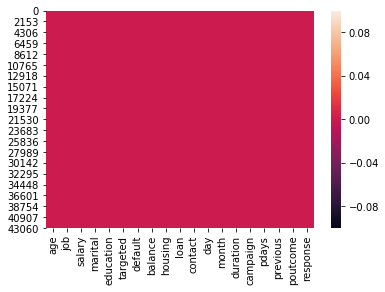

In [7]:
#Checking all the missing values in the dataset Via Heatmap

'''There are no missing values in the dataset '''

sns.heatmap(data.isnull())

### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values? 

In [8]:
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


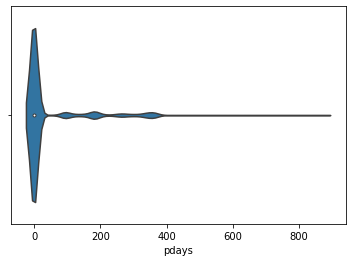

In [9]:
sns.violinplot(data['pdays'])

In [10]:
print('median',data.pdays.median())
print('mean:',data.pdays.mean())
print('mode:',data.pdays.mode())

median -1.0
mean: 40.19782796222158
mode: 0   -1
dtype: int64


### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values? 

In [11]:
data.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [12]:
#Considering all positive values in pdays columns
dataAP = data[data.pdays != -1]

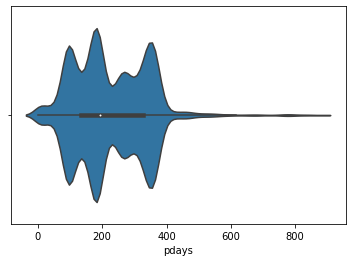

In [13]:
#Plotted the pdays value via seaborn violinplot to check the probability density of data
sns.violinplot(dataAP.pdays)

In [14]:
#As there are no values for customers who were not approached ( -1). The mean median and mode have changed significantly
print('median',dataAP.pdays.median())
print('mean:',dataAP.pdays.mean())
print('mode:',dataAP.pdays.mode())

median 194.0
mean: 224.57769165556496
mode: 0    182
dtype: int64


### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median? 

In [15]:
data.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [16]:
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [17]:
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

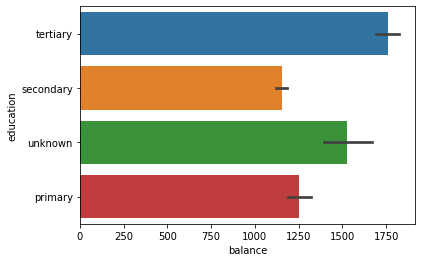

In [18]:
#Its easily evident from the below plot that Tertiary group has the highest median in compared to others
sns.barplot("balance","education",data=data)

### Make a box plot for pdays. Do you see any outliers? 

outliers with -1


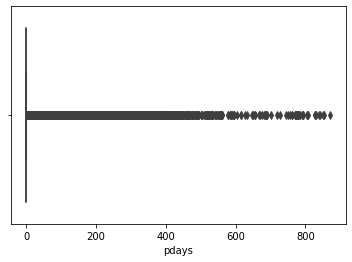

In [19]:
sns.boxplot(data.pdays)
print('outliers with -1')

outliers without -1


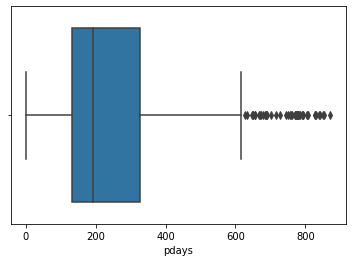

In [20]:
#Yes,there are outliers in pdays
sns.boxplot(dataAP.pdays)
print('outliers without -1')

# EDA

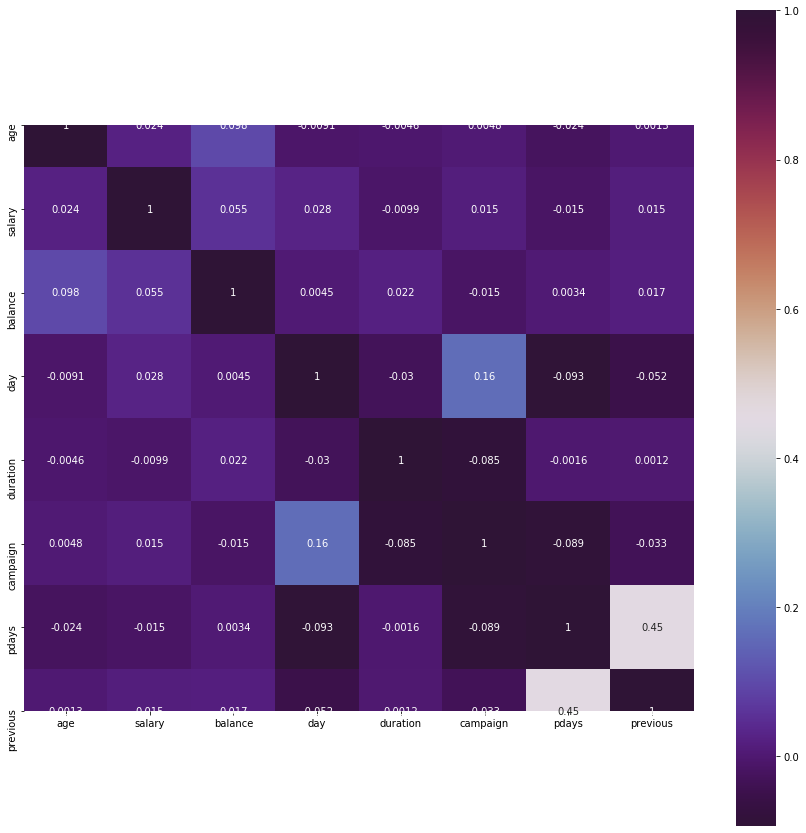

In [21]:
#This shows the corelation between all columns 
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),square=True,annot=True,cmap= 'twilight_shifted')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [23]:
data.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [24]:
data.response.head

<bound method NDFrame.head of 0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: response, Length: 45211, dtype: int64>

### Make suitable plots for associations with Numerical features and categorical features

In [25]:
cols = data.columns
num_cols= data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

### Visualizing Numerical features with Response

In [26]:
data[num_cols]

,age,salary,balance,day,duration,campaign,pdays,previous,response
0,58,100000,2143,5,261,1,-1,0,0
1,44,60000,29,5,151,1,-1,0,0
2,33,120000,2,5,76,1,-1,0,0
3,47,20000,1506,5,92,1,-1,0,0
4,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0,1
45207,71,55000,1729,17,456,2,-1,0,1
45208,72,55000,5715,17,1127,5,184,3,1
45209,57,20000,668,17,508,4,-1,0,0


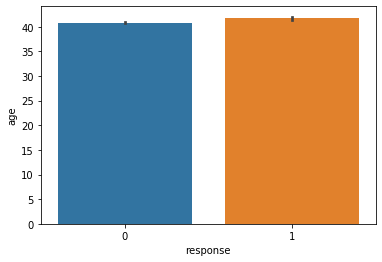

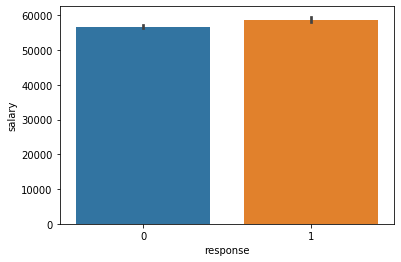

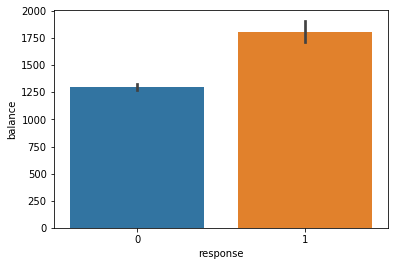

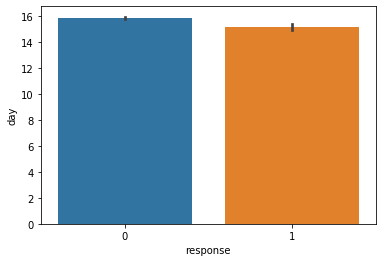

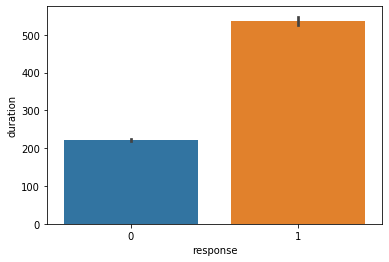

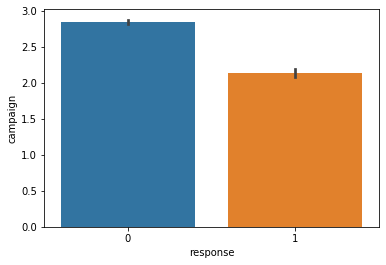

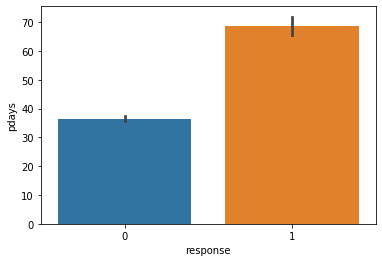

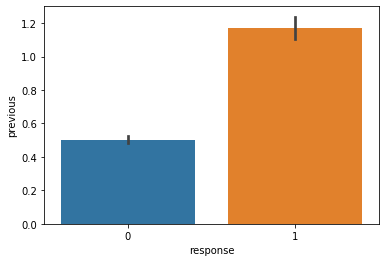

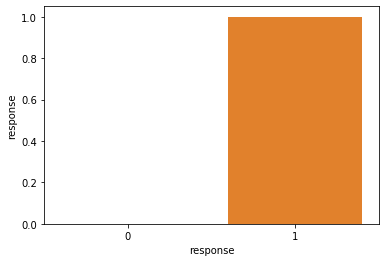

In [27]:
for i in data[num_cols]:
    sns.barplot(data.response,data[i])
    plt.show()

### Visualizing Categorical features with Response

In [28]:
data[cat_cols]

,marital,education,contact,job,poutcome,month,housing,loan,targeted,default
0,married,tertiary,unknown,management,unknown,may,yes,no,yes,no
1,single,secondary,unknown,technician,unknown,may,yes,no,yes,no
2,married,secondary,unknown,entrepreneur,unknown,may,yes,yes,yes,no
3,married,unknown,unknown,blue-collar,unknown,may,yes,no,no,no
4,single,unknown,unknown,unknown,unknown,may,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...
45206,married,tertiary,cellular,technician,unknown,nov,no,no,yes,no
45207,divorced,primary,cellular,retired,unknown,nov,no,no,yes,no
45208,married,secondary,cellular,retired,success,nov,no,no,yes,no
45209,married,secondary,telephone,blue-collar,unknown,nov,no,no,yes,no


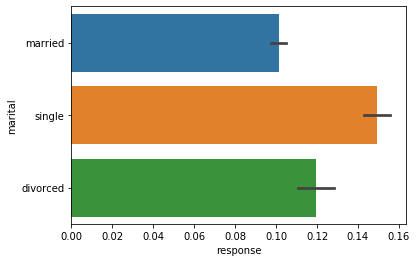

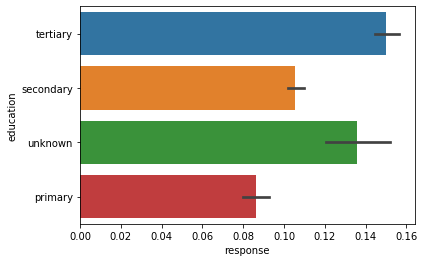

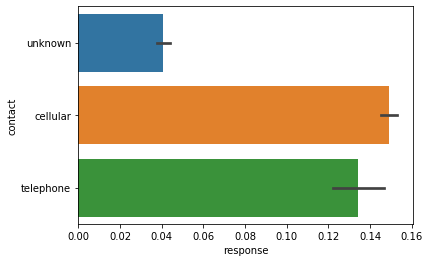

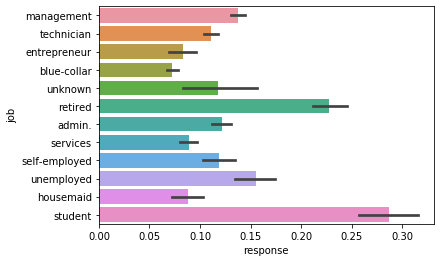

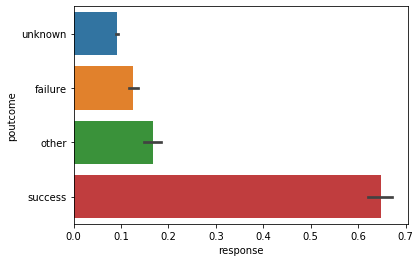

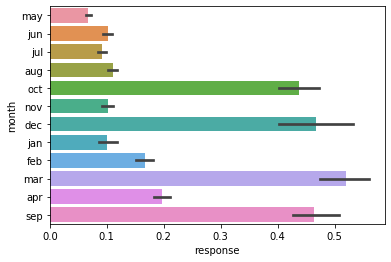

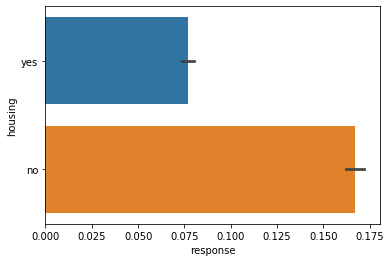

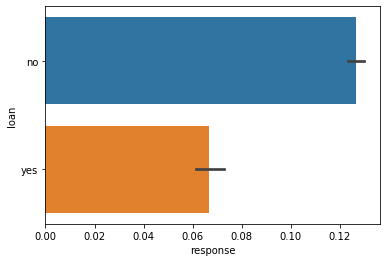

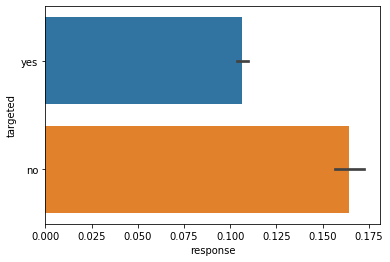

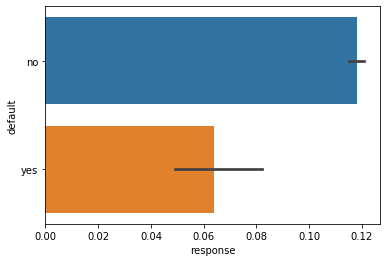

In [29]:
for i in data[cat_cols]:
    sns.barplot(data.response,data[i])
    plt.show()

## Preprocessing 

### Are the features about the previous campaign data useful? Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
data1 = data[cat_cols].apply(LabelEncoder().fit_transform)
data1

,marital,education,contact,job,poutcome,month,housing,loan,targeted,default
0,1,2,2,4,3,8,1,0,1,0
1,2,1,2,9,3,8,1,0,1,0
2,1,1,2,2,3,8,1,1,1,0
3,1,3,2,1,3,8,1,0,0,0
4,2,3,2,11,3,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,1,2,0,9,3,9,0,0,1,0
45207,0,0,0,5,3,9,0,0,1,0
45208,1,1,0,5,2,9,0,0,1,0
45209,1,1,1,1,3,9,0,0,1,0


In [32]:
dataA = data1.join(data[num_cols])
dataA

,marital,education,contact,job,poutcome,month,housing,loan,targeted,default,age,salary,balance,day,duration,campaign,pdays,previous,response
0,1,2,2,4,3,8,1,0,1,0,58,100000,2143,5,261,1,-1,0,0
1,2,1,2,9,3,8,1,0,1,0,44,60000,29,5,151,1,-1,0,0
2,1,1,2,2,3,8,1,1,1,0,33,120000,2,5,76,1,-1,0,0
3,1,3,2,1,3,8,1,0,0,0,47,20000,1506,5,92,1,-1,0,0
4,2,3,2,11,3,8,0,0,0,0,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,2,0,9,3,9,0,0,1,0,51,60000,825,17,977,3,-1,0,1
45207,0,0,0,5,3,9,0,0,1,0,71,55000,1729,17,456,2,-1,0,1
45208,1,1,0,5,2,9,0,0,1,0,72,55000,5715,17,1127,5,184,3,1
45209,1,1,1,1,3,9,0,0,1,0,57,20000,668,17,508,4,-1,0,0


In [33]:
dataA[dataA.pdays == -1]

,marital,education,contact,job,poutcome,month,housing,loan,targeted,default,age,salary,balance,day,duration,campaign,pdays,previous,response
0,1,2,2,4,3,8,1,0,1,0,58,100000,2143,5,261,1,-1,0,0
1,2,1,2,9,3,8,1,0,1,0,44,60000,29,5,151,1,-1,0,0
2,1,1,2,2,3,8,1,1,1,0,33,120000,2,5,76,1,-1,0,0
3,1,3,2,1,3,8,1,0,0,0,47,20000,1506,5,92,1,-1,0,0
4,2,3,2,11,3,8,0,0,0,0,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,2,2,0,8,3,9,0,0,0,0,23,4000,113,17,266,1,-1,0,1
45205,2,1,0,9,3,9,0,1,1,0,25,60000,505,17,386,2,-1,0,1
45206,1,2,0,9,3,9,0,0,1,0,51,60000,825,17,977,3,-1,0,1
45207,0,0,0,5,3,9,0,0,1,0,71,55000,1729,17,456,2,-1,0,1


In [34]:
dataA.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [35]:
dataA.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

### More than 70% of pdays have -1.

### After analyzing the above we know that Pdays plays an important role in model so we keep it as it is. The -1 or the missing values are kept as it is as we would not be using that in modelling part

,marital,education,contact,job,poutcome,month,housing,loan,targeted,default,age,salary,balance,day,duration,campaign,pdays,previous,response
marital,1.000000,0.108576,-0.039201,0.062045,-0.016850,-0.006991,-0.016096,-0.046893,-0.219610,-0.007023,-0.403240,-0.016633,0.002122,-0.005261,0.011852,-0.008994,0.019172,0.014973,0.045588
education,0.108576,1.000000,-0.110928,0.166707,-0.019361,-0.057304,-0.090790,-0.048574,-0.627959,-0.010718,-0.106807,0.425256,0.064514,0.022671,0.001935,0.006255,0.000052,0.017570,0.066241
contact,-0.039201,-0.110928,1.000000,-0.082063,0.272214,0.361145,0.188123,-0.010873,0.053247,0.015404,0.026221,-0.108612,-0.027273,-0.027936,-0.020839,0.019614,-0.244816,-0.147811,-0.148395
job,0.062045,0.166707,-0.082063,1.000000,0.011010,-0.092870,-0.125363,-0.033004,-0.085926,-0.006853,-0.021868,0.141655,0.018232,0.022856,0.004744,0.006839,-0.024455,-0.000911,0.040438
poutcome,-0.016850,-0.019361,0.272214,0.011010,1.000000,-0.033038,-0.099971,0.015458,0.011885,0.034898,0.007367,-0.005864,-0.020967,0.083460,0.010925,0.101588,-0.858362,-0.489752,-0.077840
month,-0.006991,-0.057304,0.361145,-0.092870,-0.033038,1.000000,0.271481,0.022145,0.031828,0.011486,-0.042357,-0.050723,0.019777,-0.006028,0.006314,-0.110031,0.033065,0.022727,-0.024471
housing,-0.016096,-0.090790,0.188123,-0.125363,-0.099971,0.271481,1.000000,0.041323,0.075543,-0.006025,-0.185513,-0.048965,-0.068768,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.046893,-0.048574,-0.010873,-0.033004,0.015458,0.022145,0.041323,1.000000,0.066297,0.077234,-0.015655,0.017749,-0.084350,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
targeted,-0.219610,-0.627959,0.053247,-0.085926,0.011885,0.031828,0.075543,0.066297,1.000000,0.008825,0.113202,-0.222868,-0.040699,-0.012891,-0.010280,-0.002597,-0.004350,-0.013253,-0.069039
default,-0.007023,-0.010718,0.015404,-0.006853,0.034898,0.011486,-0.006025,0.077234,0.008825,1.000000,-0.017879,0.006860,-0.066745,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419


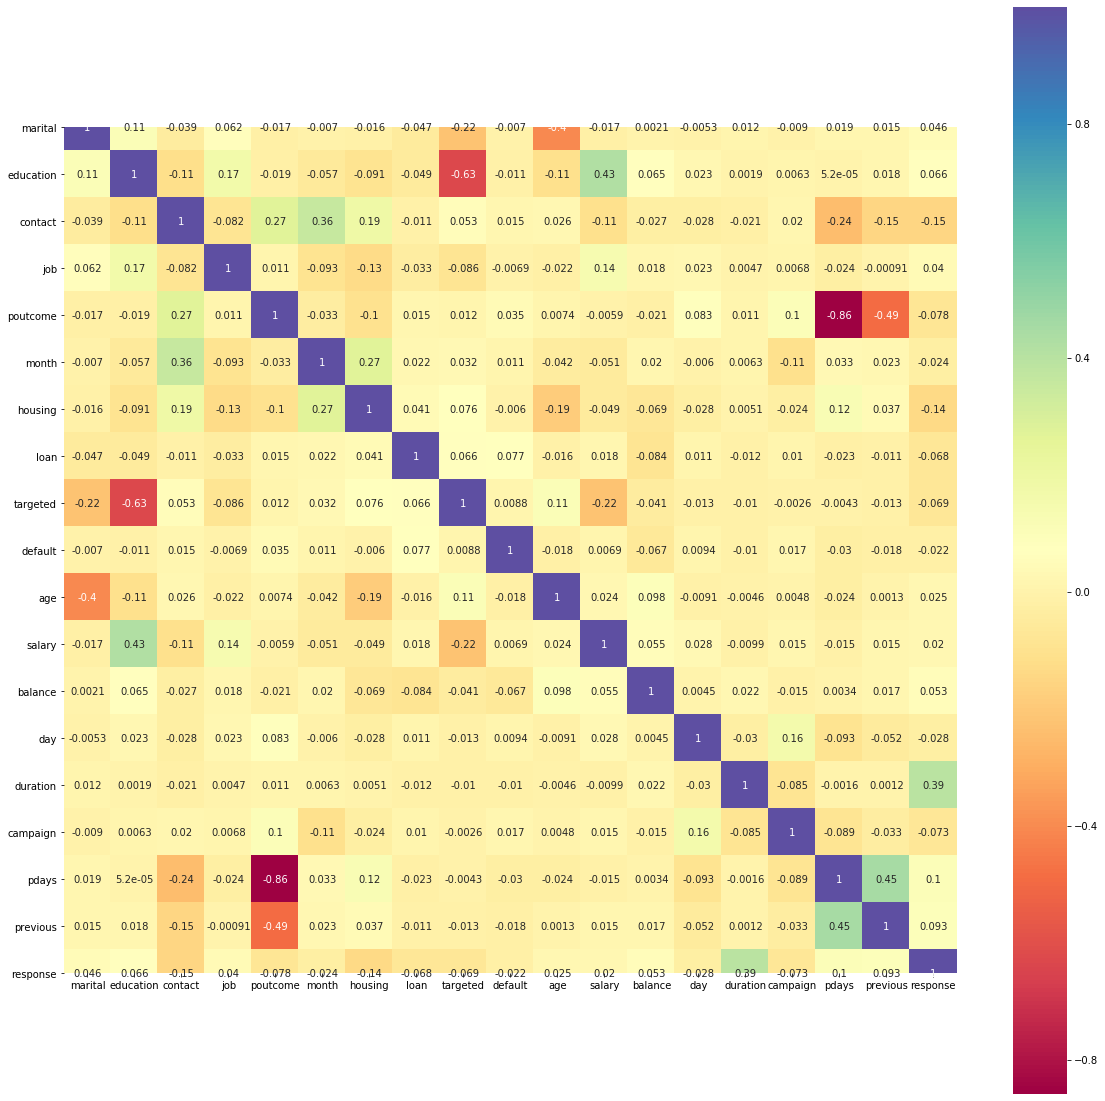

In [36]:
# Here we see the correlation of all numerical join data
plt.figure(figsize=(20,20))
sns.heatmap(dataA.corr(),square=True,annot=True,cmap= 'Spectral')
dataA.corr()

## <span style="color:Orange"> Predictive model 1: Logistic regression </span> 

## Make a predictive model using logistic regression 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

## All Single feature with Logistic Regression

In [38]:

for i in dataA.columns:
    X = dataA[[i]]
    y = dataA['response']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print("F1 Score for", i , f1_score(y_pred,y_test))

F1 Score for marital 0.0
F1 Score for education 0.0
F1 Score for contact 0.0
F1 Score for job 0.0
F1 Score for poutcome 0.0
F1 Score for month 0.0
F1 Score for housing 0.0
F1 Score for loan 0.0
F1 Score for targeted 0.0
F1 Score for default 0.0
F1 Score for age 0.0
F1 Score for salary 0.0
F1 Score for balance 0.0024984384759525295
F1 Score for day 0.0
F1 Score for duration 0.25909317389138015
F1 Score for campaign 0.0
F1 Score for pdays 0.0
F1 Score for previous 0.004932182490752157
F1 Score for response 1.0


## All Features

In [10]:
X = dataA.drop('response',axis=1)
y = dataA['response']

NameError: name 'dataA' is not defined

In [40]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


In [41]:
print('Report:\n',classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_pred,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.61      0.16      0.26      1597

    accuracy                           0.89     13564
   macro avg       0.75      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564

F1 Score: 0.25924100542138984
confusion Matrix:
 [[11798  1334]
 [  169   263]]
cross validation: [0.89914851 0.8921818  0.87989383 0.8318956  0.86627585]


## Using p values and VIF, get rid of the redundant features

In [42]:
model = sm.OLS(y, X)
results = model.fit()
start = "\033[1m" ### for bold text
print(start)
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:               response   R-squared (uncentered):                   0.303
Model:                            OLS   Adj. R-squared (uncentered):              0.303
Method:                 Least Squares   F-statistic:                              1093.
Date:                Sun, 17 May 2020   Prob (F-statistic):                        0.00
Time:                        01:42:26   Log-Likelihood:                         -7476.0
No. Observations:               45211   AIC:                                  1.499e+04
Df Residuals:                   45193   BIC:                                  1.515e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## Using RFE

In [43]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=101, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [44]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
lr.fit(X_train[cols],y_train)
y_pred2 = lr.predict(X_test[cols])


Index(['marital', 'education', 'contact', 'job', 'poutcome', 'month',
       'housing', 'loan', 'targeted', 'default', 'age', 'day', 'duration',
       'campaign', 'previous'],
      dtype='object')


### Estimate the model performance using k fold cross validation. What is the precision, recall, accuracy of your model?

In [45]:
def logReggResult():
    print('Report:\n',classification_report(y_test, y_pred2))
    print("F1 Score:",f1_score(y_pred2,y_test))
    print('AUC score:',roc_auc_score(y_test,y_pred2))
    print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))
    print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))
    print("Acurracy :::>",accuracy_score(y_pred2,y_test))

In [46]:
logReggResult()

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.63      0.21      0.32      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564

F1 Score: 0.316580554250822
AUC score: 0.5973629265075073
confusion Matrix:
 [[11772  1260]
 [  195   337]]
kfold cross validation:
 [0.89914851 0.8921818  0.87989383 0.8318956  0.86627585]
Acurracy :::> 0.8927307578885284


## Which features are the most important from your model?

In [47]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lr)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['marital', 'contact', 'poutcome', 'month', 'housing', 'targeted',
       'campaign', 'previous'],
      dtype='object')

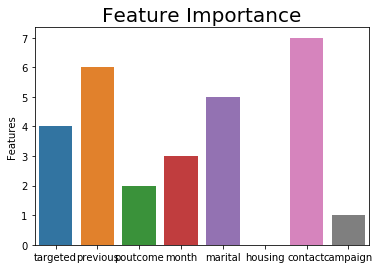

In [48]:
importances=feature_name
feature_importances=pd.Series(importances).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

## <span style="color:Orange"> Predictive model 2: Random Forest </span>

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
X = dataA.drop('response', axis = 1)
y = dataA['response']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

### Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [51]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=101,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [1]:
y_pred1 = rfc.predict(X_test)


NameError: name 'rfc' is not defined

### Estimate the model performance using k fold cross validation.What is the precision, recall, accuracy of your model?

In [53]:
def RF():
    print('Report:\n',classification_report(y_test, y_pred1))
    print("F1 Score:",f1_score(y_pred1,y_test))
    print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))
    print('kfold cross validation:',cross_val_score(rfc, X, y, cv=5))
    print('AUC score:',roc_auc_score(y_test,y_pred))
    print("Acurracy :::>",accuracy_score(y_pred,y_test))

In [54]:
RF()

Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     11967
           1       0.87      0.08      0.15      1597

    accuracy                           0.89     13564
   macro avg       0.88      0.54      0.55     13564
weighted avg       0.89      0.89      0.85     13564

F1 Score: 0.1540216771249287
confusion Matrix:
 [[11946  1462]
 [   21   135]]
kfold cross validation: [0.88300343 0.88322459 0.87447467 0.68867507 0.8195996 ]
AUC score: 0.5752808063962581
Acurracy :::> 0.8891919787673253


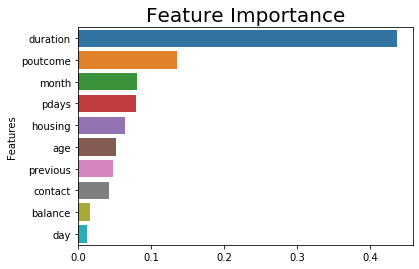

In [55]:
importances=rfc.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

## Evaluate both models on the test set.Which metric did you choose and why?  

* We choose F1 Score and Confustion Matrix for the Final comparision of both Models because the Target Variable is imbalanced. So, Precision and Recall can be the main factor for evaluation model and we get the harmonic mean for the same in form of F1 score

In [56]:
print(start +'\n\n************* Logistic Regression Result: ***************\n')
logReggResult()


print (start +'\n\n************* Random Forest Result: ***************\n')
RF()



************* Logistic Regression Result: ***************

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.63      0.21      0.32      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564

F1 Score: 0.316580554250822
AUC score: 0.5973629265075073
confusion Matrix:
 [[11772  1260]
 [  195   337]]
kfold cross validation:
 [0.89914851 0.8921818  0.87989383 0.8318956  0.86627585]
Acurracy :::> 0.8927307578885284


************* Random Forest Result: ***************

Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     11967
           1       0.87      0.08      0.15      1597

    accuracy                           0.89     13564
   macro avg       0.88      0.54      0.55     13564
weighted avg       0.89      0.89      0.85 

### Which model has better performance on the test set?

* Logistic Regression has Perfomed better in comparision to Random Forest.
* Logistic Regression has Better F1 score, AUC, Confusion Matrix, kfold Cross validation and accuracy in comparison to Random Forest.

### Compare the feature importance from the different models – do they agree? Are the top features similar in both models 

* The top features varies in both the models as the working principle of both the models are different.